In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
X = pd.read_csv('C:\Users\Eric Yang\Desktop\Kaggle Comptetion\Housing Prices/x.csv')

In [3]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X.pop('Id')

In [4]:
y = X.pop('SalePrice')

### Taking Care of Category Variables and Nan Values

In [5]:
categorical_variables = list(X.dtypes[X.dtypes == 'object'].index)
numeric = list(X.dtypes[X.dtypes != 'object'].index)

In [6]:
for variable in categorical_variables:
    X[variable].fillna('Missing', inplace = True)
    dummies = pd.get_dummies(X[variable], prefix = variable)
    X = pd.concat([X, dummies], axis = 1)
    X.drop([variable], axis = 1, inplace = True)

for var in numeric:
    X[var].fillna(value = X[var].mean(), inplace = True) 

###maybe using machine learning algorthm to predict na values rather than fill in the mean to improve accuracy


### A Quick Model for Benchmark

In [10]:
model = RandomForestRegressor(100, oob_score=True, random_state = 42)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [11]:
model.oob_score_

0.8671249709442207

# Error
# y_oob = model.oob_prediction_
# print 'roc-auc', roc_auc_score(y, y_oob)

In [15]:
y_oob = model.oob_prediction_
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print mean_absolute_error(y, y_oob )
print mean_squared_error(y, y_oob )

17417.9361911
838014716.527


### Hyperparameter Tuning

In [26]:
param_grid = { 
    'n_estimators': [1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1,2,3]
}

In [27]:
CV_rfr = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10, n_jobs = -1)
CV_rfr.fit(X, y)
print CV_rfr.best_params_

{'max_features': 'auto', 'n_estimators': 1000, 'min_samples_leaf': 1}


In [28]:
model = RandomForestRegressor(1000, oob_score=True, random_state = 42)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [29]:
model.oob_score_

0.86414870206252814

In [30]:
y_oob = model.oob_prediction_
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print mean_absolute_error(y, y_oob )
print mean_squared_error(y, y_oob )

17210.2425351
856785415.137


# Not Necessary Better

# The Rest Is Feature Selection and Engineering

C:\Users\Eric Yang\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


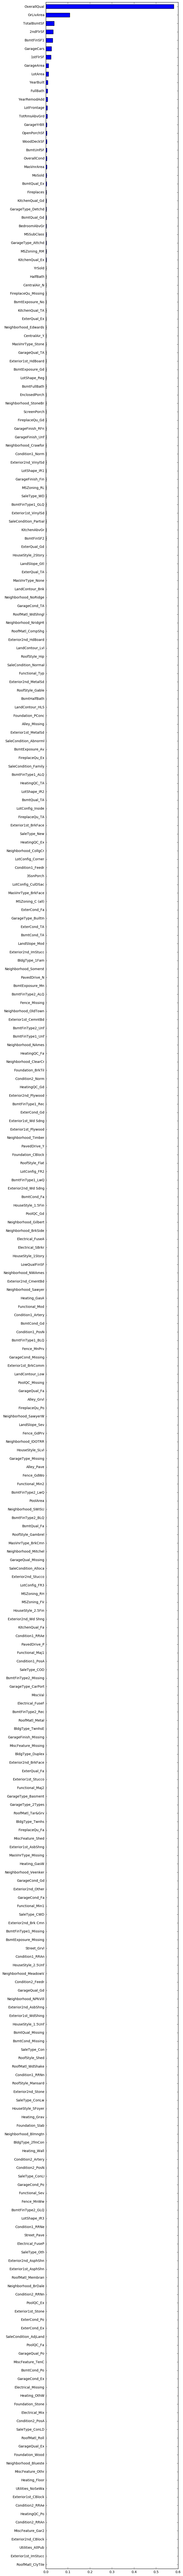

In [17]:
import matplotlib.pyplot as plt
% matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.sort()
feature_importances.plot(kind = 'barh', figsize = (7,136));

## Question: is it a good idea to scale some of the data (preprocessing) such as getting Z value? (X - stdev)/mean?